In [2]:
  #import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
df=pd.read_csv("Financial Analytics data.csv")

In [4]:
#number of rows and columns in the daatset
df.shape

(488, 5)

In [5]:
#print first five rows of dataset
df.head()


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [6]:
#giving information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


# Data Cleaning

In [7]:
#drop unrelated/ blank column
df.drop(['Unnamed: 4'], axis=1,inplace=True)

In [8]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [9]:
#check for null values(true/false)
df.isnull()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
483,False,False,False,False
484,False,False,False,False
485,False,False,False,False
486,False,False,False,False


In [10]:
#total of null values
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

In [11]:
df.shape

(488, 4)

In [12]:
# drop the null values 
df.dropna(inplace=True)

In [14]:
df.shape

(365, 4)

In [21]:
#checking for duplicate vales in the row
df['Sales Qtr - Crore'].duplicated()
df['Mar Cap - Crore'].duplicated()
df['Name'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
482    False
483    False
484    False
485    False
486    False
Name: Name, Length: 365, dtype: bool

No Duplicate values found

In [26]:
#creating new column named"marcap to salesqtr ratio"
df["marcap to salesqtr ratio"] = df["Mar Cap - Crore"] / df["Sales Qtr - Crore"]

In [27]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,marcap to salesqtr ratio
0,1,Reliance Inds.,583436.72,99810.00,5.845474
1,2,TCS,563709.84,30904.00,18.240676
2,3,HDFC Bank,482953.59,20581.27,23.465685
3,4,ITC,320985.27,9772.02,32.847382
4,5,H D F C,289497.37,16840.51,17.190535


In [75]:
#Max value of market cap and sales qtr
m=df['Mar Cap - Crore'].max()
s=df['Sales Qtr - Crore'].max()

In [76]:
print(m)
print(s)

583436.72
110666.93


In [78]:
#Min value of market cap and sales qtr
c=df['Mar Cap - Crore'].min()
q=df['Sales Qtr - Crore'].min()

In [79]:
print(c)
print(q)

3017.07
47.24


In [71]:
#print top 5 companies by sales qtr parameter
p=df.nlargest(5, columns=["Sales Qtr - Crore"], keep='first')
print(p)

    S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  \
14     15         I O C L        178017.48          110666.93   
0       1  Reliance Inds.        583436.72           99810.00   
23     24     Tata Motors        117071.87           74156.07   
27     28         B P C L         98278.00           60616.36   
54     55         H P C L         58034.78           57474.25   

    marcap to salesqtr ratio  
14                  1.608588  
0                   5.845474  
23                  1.578723  
27                  1.621311  
54                  1.009753  


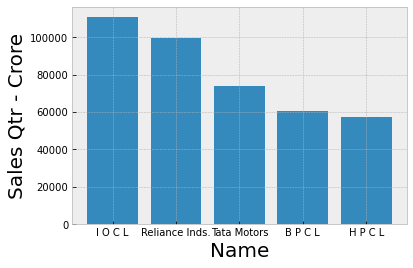

In [81]:
#plot the graph of compaines vs sales
x=p['Name']
y=p['Sales Qtr - Crore']
plt.xlabel('Name', fontsize=20)
plt.ylabel('Sales Qtr - Crore', fontsize =20)
plt.bar(x,y)
plt.show()

Sales refer to any transactions where money or value is exchanged for the ownernship of a good or service.Here company named as IOCL has the best sales.

In [82]:
#print top 5 companies by market cap parameter
f=df.nlargest(5, columns=["Mar Cap - Crore"], keep='first')
print(f)

   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  \
0      1  Reliance Inds.        583436.72           99810.00   
1      2             TCS        563709.84           30904.00   
2      3       HDFC Bank        482953.59           20581.27   
3      4             ITC        320985.27            9772.02   
4      5         H D F C        289497.37           16840.51   

   marcap to salesqtr ratio  
0                  5.845474  
1                 18.240676  
2                 23.465685  
3                 32.847382  
4                 17.190535  


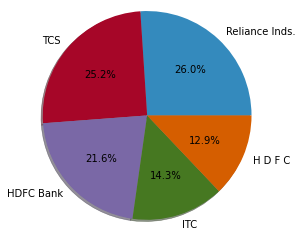

In [85]:
#plot the graph of compaines vs market cap
x=f['Name']
y=f['Mar Cap - Crore']
plt.pie(y, labels=x, radius =1.2,autopct='%0.01f%%', shadow=True,)
plt.show()

High market cap signifies that the company has a larger presence in the market .Here Reliance Inds. has the largest presence.

In [90]:
#print top 5 companies vs marcap to salesqtr ratio 
g=df.nsmallest(5, columns=["marcap to salesqtr ratio"], keep='first')
print(g)

     S.No.              Name  Mar Cap - Crore  Sales Qtr - Crore  \
320    333   Redington India          5896.54           11728.40   
122    123    Rajesh Exports         23495.54           41304.84   
334    347           C P C L          5427.82            8587.17   
441    454  Corporation Bank          3716.46            4387.85   
444    457     Oriental Bank          3674.60            4262.08   

     marcap to salesqtr ratio  
320                  0.502757  
122                  0.568833  
334                  0.632085  
441                  0.846989  
444                  0.862161  


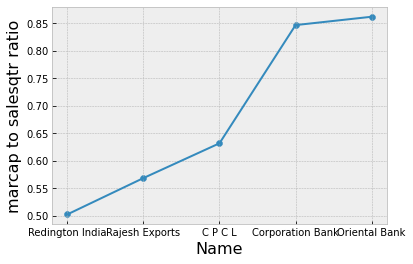

In [92]:
x=g['Name']
y=g['marcap to salesqtr ratio']
plt.xlabel('Name', fontsize=16)
plt.ylabel('marcap to salesqtr ratio', fontsize =16)
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

Market cap to sales ratio indicates how the market is pricing every rupee sale of the company.The lower the Market cap to sales ratio , the better it is .So,here the company named as Redington India has the best marketcap to sales ratio.

In [95]:
df.to_csv("cleanedFAD.CSV", index=False)